In [1]:
import matplotlib.pyplot as plt
from lmfit import Parameters
from lmfit import minimize, fit_report

In [2]:
import pyroll.core as pr
import pyroll.pillar_model
import pyroll.neutral_point_estimator
import pyroll.sparling_spreading
import pyroll.hensel_force_torque
import pyroll.freiberg_flow_stress
import pyroll.ring_model_thermal
from pyroll.freiberg_flow_stress import flow_stress

In [3]:
from in_profile import create_in_profile_for_finishing_train
from rolling_sequence import finishing_pass_design_1, finishing_pass_design_2, finishing_pass_design_3, finishing_pass_design_4
from utilities import *

In [4]:
pyroll.pillar_model.Config.PILLAR_COUNT = 30
pyroll.neutral_point_estimator.Config.ESTIMATOR = "EQUAL"
ROLL_SURFACE_TEMPERATURE = 50 + 273.15
DISK_ELEMENT_COUNT = 30

In [5]:
@pr.CoolingPipe.DiskElement.heat_transfer_coefficient
def heat_transfer_coefficient_model_moreales(self: pr.CoolingPipe.DiskElement):
    mean_surface_temperature = (self.in_profile.surface_temperature + self.out_profile.surface_temperature) / 2
    profile_surface_temperature_celsius = mean_surface_temperature - 273.15
    return 13950 + 5.12 * 1e6 / profile_surface_temperature_celsius

In [6]:
in_profile = create_in_profile_for_finishing_train(950 + 273.15)
in_profile.ring_temperatures = in_profile.ring_temperatures

In [7]:
rolling_train_rpd1 = finishing_pass_design_1(ROLL_SURFACE_TEMPERATURE, DISK_ELEMENT_COUNT)
rolling_train_rpd2 = finishing_pass_design_2(ROLL_SURFACE_TEMPERATURE, DISK_ELEMENT_COUNT)
rolling_train_rpd3 = finishing_pass_design_3(ROLL_SURFACE_TEMPERATURE, DISK_ELEMENT_COUNT)
rolling_train_rpd4 = finishing_pass_design_4(ROLL_SURFACE_TEMPERATURE, DISK_ELEMENT_COUNT)

In [ ]:
rolling_train_rpd1.solve(in_profile)
rolling_train_rpd2.solve(in_profile)
rolling_train_rpd3.solve(in_profile)
rolling_train_rpd4.solve(in_profile)

In [21]:
sequences = [
    {
        "label": "RPD1",
        "sequence": rolling_train_rpd1
    },
    {
        "label": "RPD2",
        "sequence": rolling_train_rpd2
    },
    {
        "label": "RPD3",
        "sequence": rolling_train_rpd3
    },
    {
        "label": "RPD4",
        "sequence": rolling_train_rpd4
    }
]

In [22]:
def solve_total_wear_depths_as_contour_line(params):
    area_errors = []

    for entry in sequences:
        groove_label = entry["label"]
        sequence = entry["sequence"]
        roll_passes = sequence.roll_passes
        measurements = extract_wear_contours_from_measurement(groove_label)

        for measurement_id, labels, tonnages, measured_wear_contours in measurements:

            for roll_pass in roll_passes:
                for label, tonnage, measured_wear_contour in zip(labels, tonnages, measured_wear_contours):
                    if roll_pass.label == label:

                        wear_coefficient = get_wear_coefficient(roll_pass, params)
                        calculated_wear_contour = calculate_wear_contour(roll_pass, wear_coefficient, tonnage * 1000)
                        area_error = calculate_area_between_contours(calculated_wear_contour, measured_wear_contour)
                        area_errors.append(area_error)
                    else:
                        continue
    rms_error = root_mean_square_value(np.array(area_errors))
    print("RMS error: ", rms_error)
    return np.array(area_errors)


def solve_total_wear_depths_as_contour_line_4_pass_block(params):
    area_errors = []

    for entry in sequences:
        groove_label = entry["label"]
        sequence = entry["sequence"]
        roll_passes = sequence.roll_passes
        measurements = extract_wear_contours_from_measurement(groove_label)

        for measurement_id, labels, tonnages, measured_wear_contours in measurements:
            for roll_pass in roll_passes:
                for label, tonnage, measured_wear_contour in zip(labels, tonnages, measured_wear_contours):
                    if roll_pass.label == label and label in ["17-H", "18-V"]:

                        wear_coefficient = get_wear_coefficient(roll_pass, params)
                        calculated_wear_contour = calculate_wear_contour(roll_pass, wear_coefficient, tonnage * 1000)
                        area_error = calculate_area_between_contours(calculated_wear_contour, measured_wear_contour)
                        area_errors.append(area_error)
                    else:
                        continue
    rms_error = root_mean_square_value(np.array(area_errors))
    print("RMS error: ", rms_error)
    return np.array(area_errors)


def solve_total_wear_depths_as_contour_line_6_pass_block(params):
    area_errors = []

    for entry in sequences:
        groove_label = entry["label"]
        sequence = entry["sequence"]
        roll_passes = sequence.roll_passes
        measurements = extract_wear_contours_from_measurement(groove_label)

        for measurement_id, labels, tonnages, measured_wear_contours in measurements:
            for roll_pass in roll_passes:
                for label, tonnage, measured_wear_contour in zip(labels, tonnages, measured_wear_contours):
                    if roll_pass.label == label and label in ["21-H", "22-V", "23-H", "24-V"]:

                        wear_coefficient = get_wear_coefficient(roll_pass, params)
                        calculated_wear_contour = calculate_wear_contour(roll_pass, wear_coefficient, tonnage * 1000)
                        area_error = calculate_area_between_contours(calculated_wear_contour, measured_wear_contour)
                        area_errors.append(area_error)
                    else:
                        continue
    rms_error = root_mean_square_value(np.array(area_errors))
    print("RMS error: ", rms_error)
    return np.array(area_errors)


def solve_total_wear_depths_as_contour_line_csb_block(params):
    area_errors = []

    for entry in sequences:
        groove_label = entry["label"]
        sequence = entry["sequence"]
        roll_passes = sequence.roll_passes
        measurements = extract_wear_contours_from_measurement(groove_label)

        for measurement_id, labels, tonnages, measured_wear_contours in measurements:
            for roll_pass in roll_passes:
                for label, tonnage, measured_wear_contour in zip(labels, tonnages, measured_wear_contours):
                    if roll_pass.label == label and label in ["27-H", "28-V"]:

                        wear_coefficient = get_wear_coefficient(roll_pass, params)
                        calculated_wear_contour = calculate_wear_contour(roll_pass, wear_coefficient, tonnage * 1000)
                        area_error = calculate_area_between_contours(calculated_wear_contour, measured_wear_contour)
                        area_errors.append(area_error)
                    else:
                        continue
    rms_error = root_mean_square_value(np.array(area_errors))
    print("RMS error: ", rms_error)
    return np.array(area_errors)

In [23]:
params_constant_cobyla = Parameters()
params_constant_cobyla.add('wear_coefficient', value=1e-5, min=1e-20, max=1e-1, vary=True)

params_4_pass_block_cobyla = Parameters()
params_4_pass_block_cobyla.add('wear_coefficient', value=1e-5, min=1e-20, max=1e-1, vary=True)

params_6_pass_block_cobyla = Parameters()
params_6_pass_block_cobyla.add('wear_coefficient', value=1e-5, min=1e-20, max=1e-1, vary=True)

params_csb_block_cobyla = Parameters()
params_csb_block_cobyla.add('wear_coefficient', value=1e-5, min=1e-20, max=1e-1, vary=True)

In [24]:
result_constant_cobyla = minimize(
    solve_total_wear_depths_as_contour_line,
    params_constant_cobyla,
    nan_policy='omit',
    max_nfev=100,
    method="cobyla"
)

RMS error:  0.2864147951669552
RMS error:  682.5807649837855
RMS error:  634.3808640111728
RMS error:  161.83262701000174
RMS error:  51.88327258975681
RMS error:  7.8870647985748725
RMS error:  4.870837054836315
RMS error:  0.09061562985209136
RMS error:  0.5171266860063614
RMS error:  0.00845724040558637
RMS error:  0.00015540466140066494
RMS error:  0.004198927485702105
RMS error:  0.00018225250949943265
RMS error:  0.0006541295432020753
RMS error:  3.4098618969742185e-05
RMS error:  2.357974784221935e-06
RMS error:  8.127179273170321e-06
RMS error:  2.8621750195606736e-06
RMS error:  2.8621750195606736e-06
RMS error:  2.8621750195606736e-06
RMS error:  5.431764073554067e-05
RMS error:  8.127179273170321e-06


In [25]:
result_4_pass_block_cobyla = minimize(
    solve_total_wear_depths_as_contour_line_4_pass_block,
    params_4_pass_block_cobyla,
    nan_policy='omit',
    max_nfev=100,
    method="cobyla"
)

RMS error:  0.29483310155335185
RMS error:  702.63948234233
RMS error:  653.0231510145223
RMS error:  166.5883363715706
RMS error:  53.407946202446915
RMS error:  8.11884023157146
RMS error:  5.013975863105345
RMS error:  0.0932800679545548
RMS error:  0.5323248263538427
RMS error:  0.008707324172428983
RMS error:  0.00016152220255808257
RMS error:  0.004323873882387917
RMS error:  0.0001891595681022009
RMS error:  0.0006749056815374978
RMS error:  3.66372896149476e-05
RMS error:  7.859571417604321e-07
RMS error:  9.85606752384451e-06
RMS error:  4.247187047122131e-06
RMS error:  4.247187047122131e-06
RMS error:  4.247187047122131e-06
RMS error:  5.7457183732515505e-05
RMS error:  9.85606752384451e-06


In [26]:
result_6_pass_block_cobyla = minimize(
    solve_total_wear_depths_as_contour_line_6_pass_block,
    params_6_pass_block_cobyla,
    nan_policy='omit',
    max_nfev=100,
    method="cobyla"
)

RMS error:  0.32859423435276097
RMS error:  783.1037702320649
RMS error:  727.8055166902045
RMS error:  185.66556011025943
RMS error:  59.524071127756116
RMS error:  9.04858457645504
RMS error:  5.588159904462005
RMS error:  0.10395991626177843
RMS error:  0.593282841120722
RMS error:  0.00970214060374554
RMS error:  0.00017769842470774692
RMS error:  0.004816710040086668
RMS error:  0.00020850059663001202
RMS error:  0.0007498724858412223
RMS error:  3.85169417686736e-05
RMS error:  3.0375928132436774e-06
RMS error:  8.671692455455874e-06
RMS error:  2.5623799942518744e-06
RMS error:  2.5623799942518744e-06
RMS error:  2.5623799942518744e-06
RMS error:  6.17187428511973e-05
RMS error:  8.671692455455874e-06


In [35]:
result_csb_block_cobyla = minimize(
    solve_total_wear_depths_as_contour_line_csb_block,
    params_csb_block_cobyla,
    nan_policy='omit',
    max_nfev=100,
    method="cobyla"
)

RMS error:  0.13227884361471787
RMS error:  315.2464380255067
RMS error:  292.9855600577548
RMS error:  74.74157147079814
RMS error:  23.96202396150181
RMS error:  3.642600209161635
RMS error:  2.249570838324097
RMS error:  0.041849999629525764
RMS error:  0.23883195148482014
RMS error:  0.003905567316200431
RMS error:  7.140950442167383e-05
RMS error:  0.001938887273865766
RMS error:  8.380867489954599e-05
RMS error:  0.00030174113685728463
RMS error:  1.5393751507292024e-05
RMS error:  1.5728449534004906e-06
RMS error:  3.4396699630938155e-06
RMS error:  1.1658997041415815e-06
RMS error:  9.485159569114756e-06
RMS error:  9.485159569114756e-06
RMS error:  9.485159569114756e-06
RMS error:  4.66000961665396e-05
RMS error:  1.5728449534004906e-06


In [34]:
print(fit_report(result_csb_block_cobyla))

[[Fit Statistics]]
    # fitting method   = COBYLA
    # function evals   = 19
    # data points      = 14
    # variables        = 1
    chi-square         = 1.2596e-09
    reduced chi-square = 9.6889e-11
    Akaike info crit   = -321.841900
    Bayesian info crit = -321.202842
[[Variables]]
    wear_coefficient:  8.1723e-10 +/- 1.5063e-10 (18.43%) (init = 1e-05)


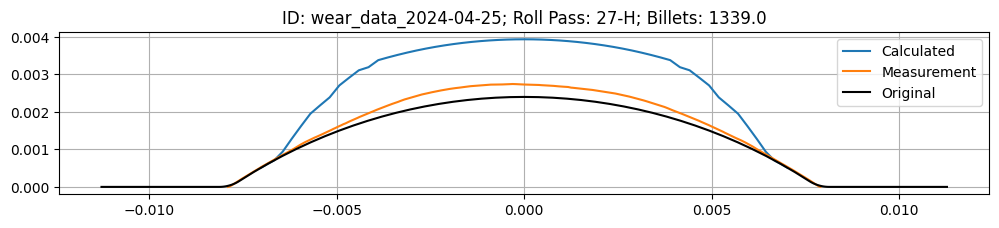

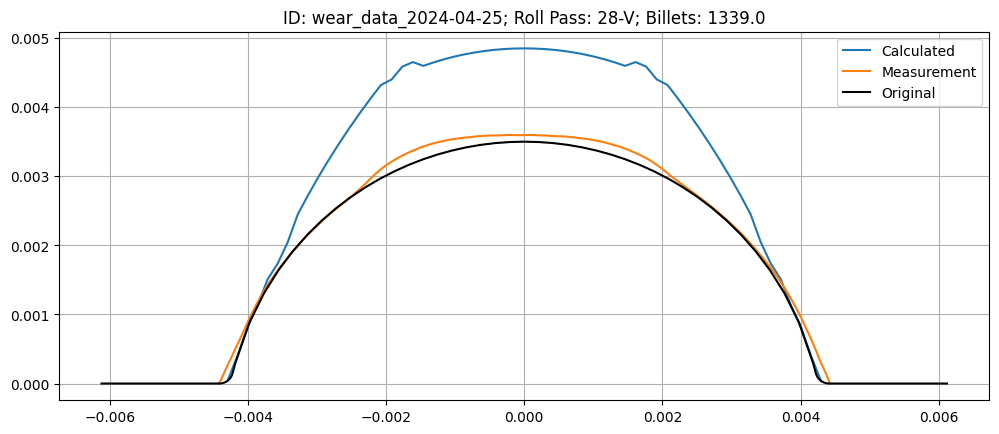

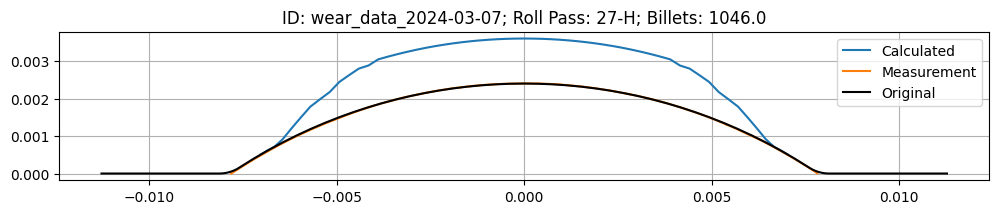

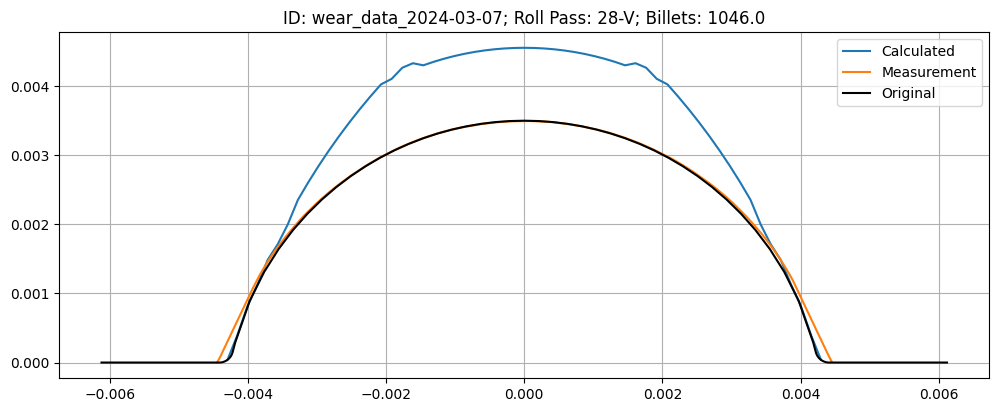

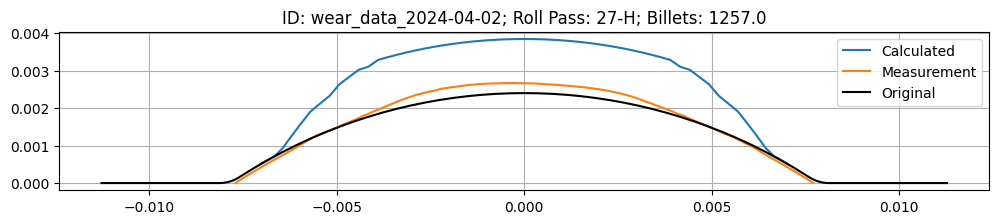

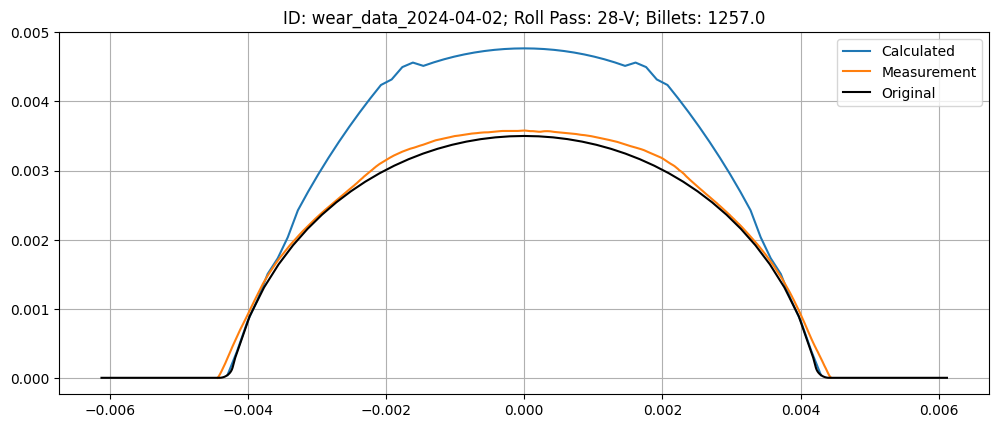

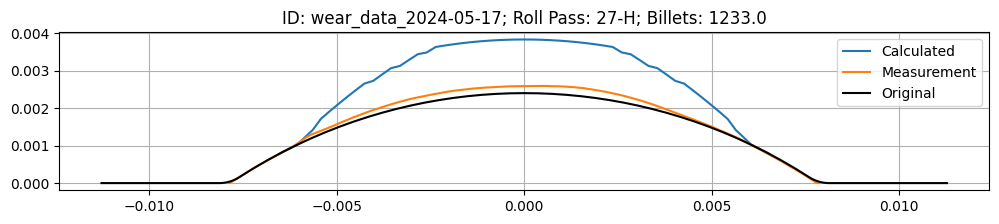

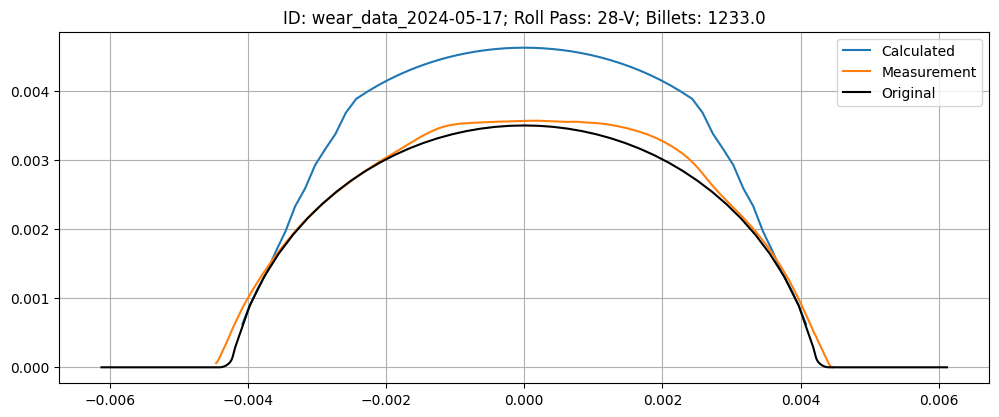

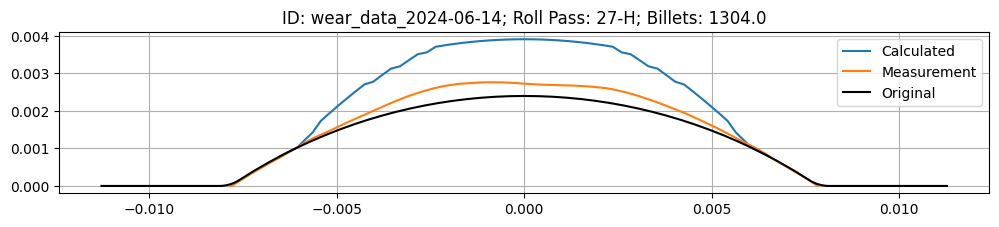

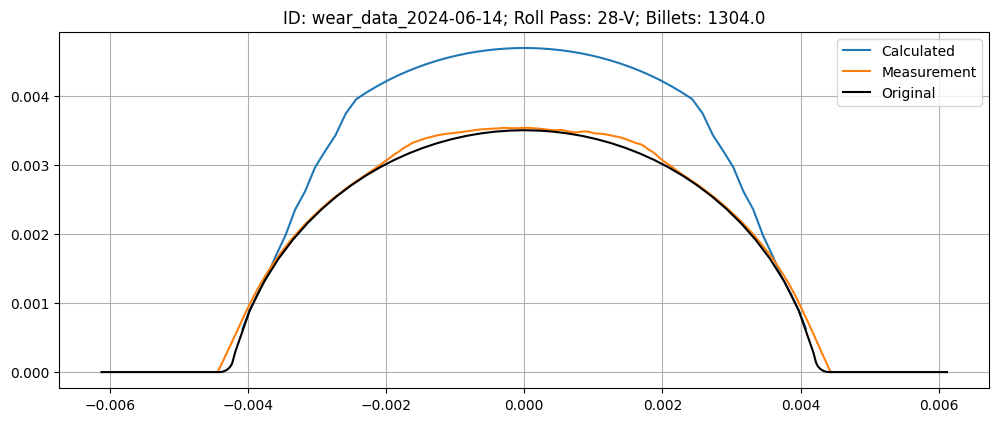

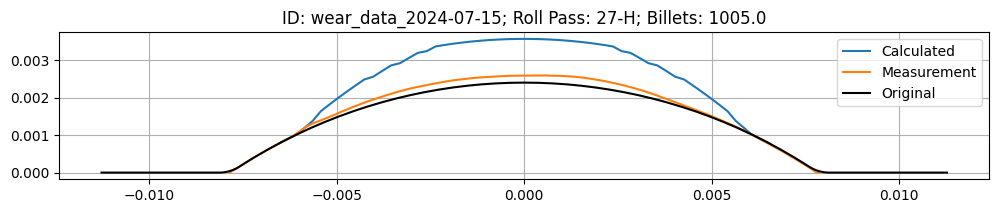

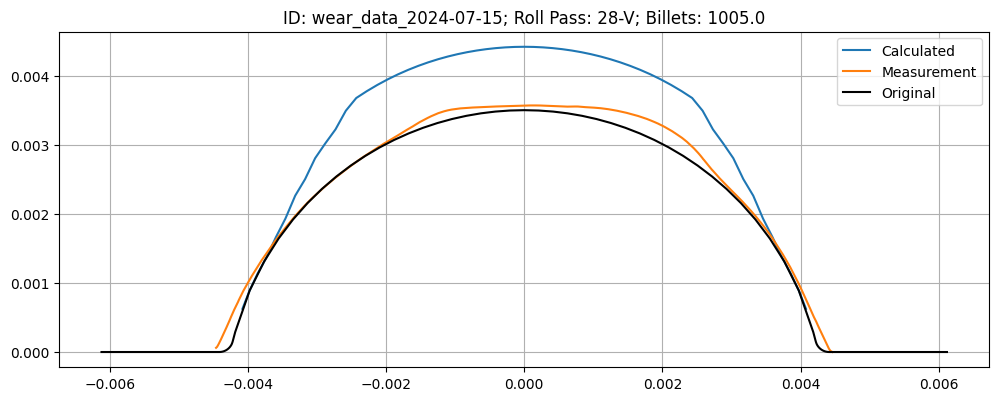

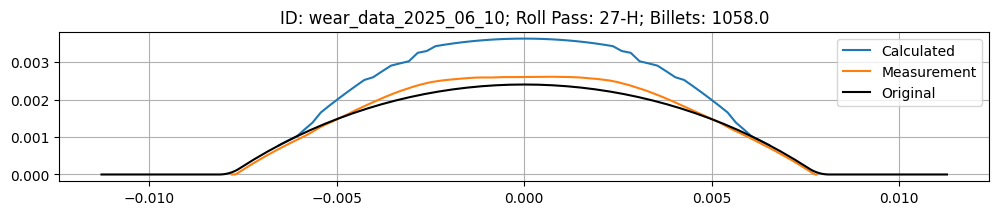

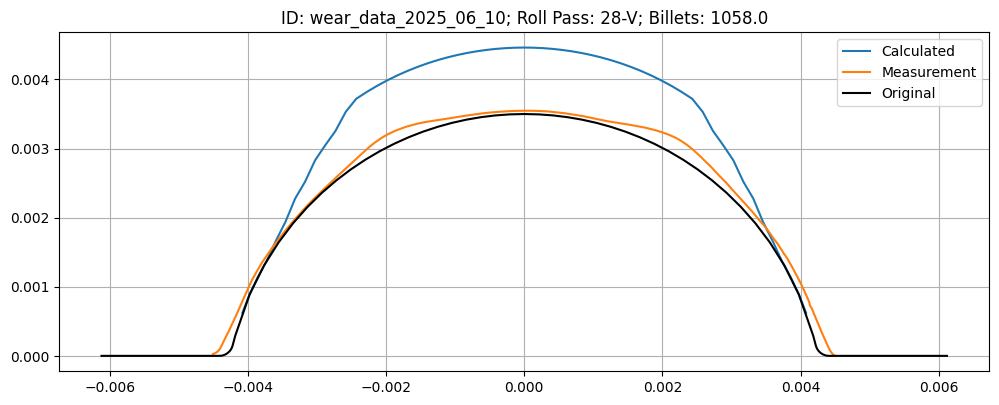

In [32]:
measured_wear_area = []
calculated_wear_area = []

measured_wear_area_4_pass = []
calculated_wear_area_4_pass = []

measured_wear_area_6_pass = []
calculated_wear_area_6_pass = []

measured_wear_area_csb = []
calculated_wear_area_csb = []

for entry in sequences:
    groove_label = entry["label"]
    sequence = entry["sequence"]
    roll_passes = sequence.roll_passes
    measurements = extract_wear_contours_from_measurement(groove_label)
    for measurement_id, labels, tonnages, measured_wear_contours in measurements:
        for roll_pass in roll_passes:
            for label, tonnage, measured_wear_contour in zip(labels, tonnages, measured_wear_contours):
                if roll_pass.label == label:
                    measured_wear_area.append(calculate_area_between_contours(roll_pass.roll.contour_line, measured_wear_contour))
                    calculated_wear_contour = calculate_wear_contour(roll_pass, result_constant_cobyla.params['wear_coefficient'].value, tonnage * 1000)
                    calculated_wear_area.append(calculate_area_between_contours(roll_pass.roll.contour_line, calculated_wear_contour))
                    if roll_pass.label in ["17-H", "18-V"]:
                        calculated_wear_contour = calculate_wear_contour(roll_pass, result_4_pass_block_cobyla.params['wear_coefficient'].value, tonnage * 1000)
                        calculated_wear_area_4_pass.append(calculate_area_between_contours(roll_pass.roll.contour_line, calculated_wear_contour))
                        measured_wear_area_4_pass.append(calculate_area_between_contours(roll_pass.roll.contour_line, measured_wear_contour))
                    elif roll_pass.label in ["21-H", "22-V", "23-H", "24-V"]:
                         calculated_wear_contour = calculate_wear_contour(roll_pass, result_6_pass_block_cobyla.params['wear_coefficient'].value, tonnage * 1000)
                         calculated_wear_area_6_pass.append(calculate_area_between_contours(roll_pass.roll.contour_line, calculated_wear_contour))
                         measured_wear_area_6_pass.append(calculate_area_between_contours(roll_pass.roll.contour_line, measured_wear_contour))
                    elif roll_pass.label in ["27-H", "28-V"]:
                         calculated_wear_contour = calculate_wear_contour(roll_pass, result_csb_block_cobyla.params['wear_coefficient'].value, tonnage * 1000)
                         calculated_wear_area_csb.append(calculate_area_between_contours(roll_pass.roll.contour_line, calculated_wear_contour))
                         measured_wear_area_csb.append(calculate_area_between_contours(roll_pass.roll.contour_line, measured_wear_contour))
                         number_of_billets = np.round(tonnage * 1000 / 2400)
                         fig, ax = plt.subplots(figsize=(12, 8))
                         ax.grid()
                         title_string = "ID: " + measurement_id + "; Roll Pass: " + label + "; Billets: " + str(
                            number_of_billets)
                         ax.set_title(title_string)
                         ax.set_aspect('equal')
                         ax.plot(*calculated_wear_contour.xy, label="Calculated")
                         ax.plot(*measured_wear_contour.xy, label="Measurement")
                         ax.plot(*roll_pass.roll.contour_line.xy, label="Original", color='black')
                         ax.legend()

In [38]:
len(measured_wear_area)

61

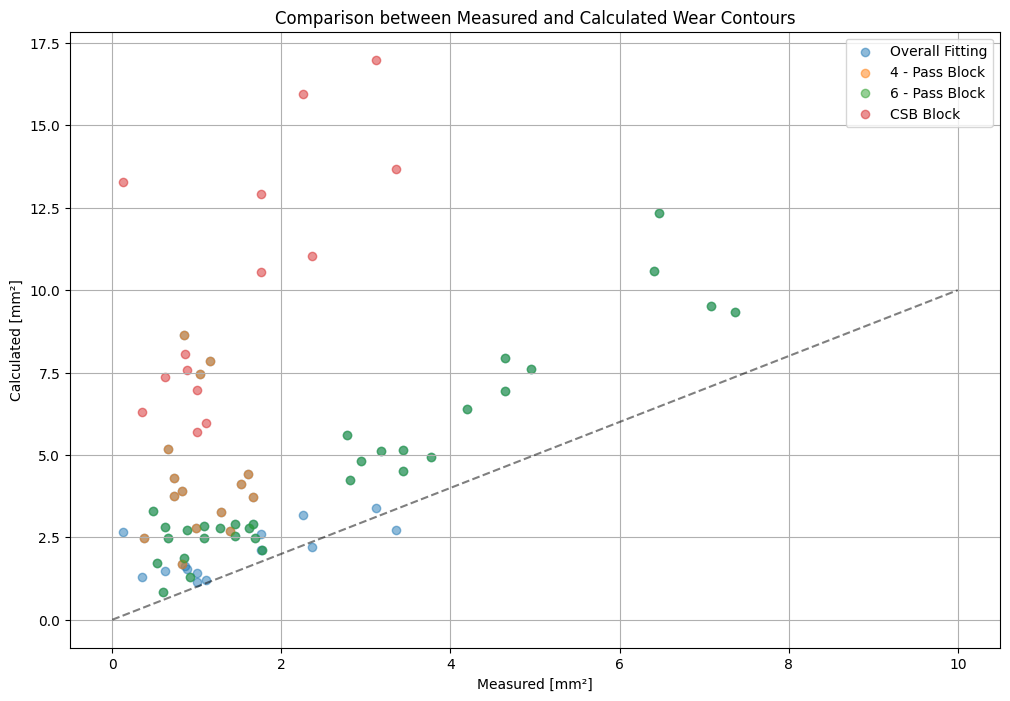

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(np.array(measured_wear_area) * 1e6, np.array(calculated_wear_area) * 1e6, color='C0', alpha=0.5, label="Overall Fitting")
ax.scatter(np.array(measured_wear_area_4_pass) * 1e6, np.array(calculated_wear_area_4_pass) * 1e6, color='C1', alpha=0.5, label="4 - Pass Block")
ax.scatter(np.array(measured_wear_area_6_pass) * 1e6, np.array(calculated_wear_area_6_pass) * 1e6, color='C2', alpha=0.5, label="6 - Pass Block")
ax.scatter(np.array(measured_wear_area_csb) * 1e6, np.array(calculated_wear_area_csb) * 1e6, color='C3', alpha=0.5, label="CSB Block")
ax.plot(np.linspace(0, 10, 10), np.linspace(0, 10, 10), alpha=0.5, ls='--', color='black')
ax.grid()
ax.set_title("Comparison between Measured and Calculated Wear Contours")
ax.set_ylabel("Calculated [mm²]")
ax.set_xlabel("Measured [mm²]")

handels, labels = ax.get_legend_handles_labels()
unique_legends = dict(zip(labels, handels))
ax.legend(
    unique_legends.values(), unique_legends.keys(),
    loc="upper right"
)
